In [2]:
# Paso 0: Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.feature_selection import SelectKBest, f_classif


In [8]:
# Paso 1: Cargar y analizar los datos
data = pd.read_csv('Mall_Customers.csv', sep=";")
print("Primeras filas del dataset:")
print(data.head())
print("\nResumen estadístico:")
print(data.describe())
print("\nInformación del dataset:")
print(data.info())

Primeras filas del dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       1   19                  15                      39
1           2       1   21                  15                      81
2           3       0   20                  16                       6
3           4       0   23                  16                      77
4           5       0   31                  17                      40

Resumen estadístico:
       CustomerID      Gender         Age  Annual Income (k$)  \
count  200.000000  200.000000  200.000000          200.000000   
mean   100.500000    0.440000   38.850000           60.560000   
std     57.879185    0.497633   13.969007           26.264721   
min      1.000000    0.000000   18.000000           15.000000   
25%     50.750000    0.000000   28.750000           41.500000   
50%    100.500000    0.000000   36.000000           61.500000   
75%    150.250000    1.000000   49.000000           78.000000   
max 

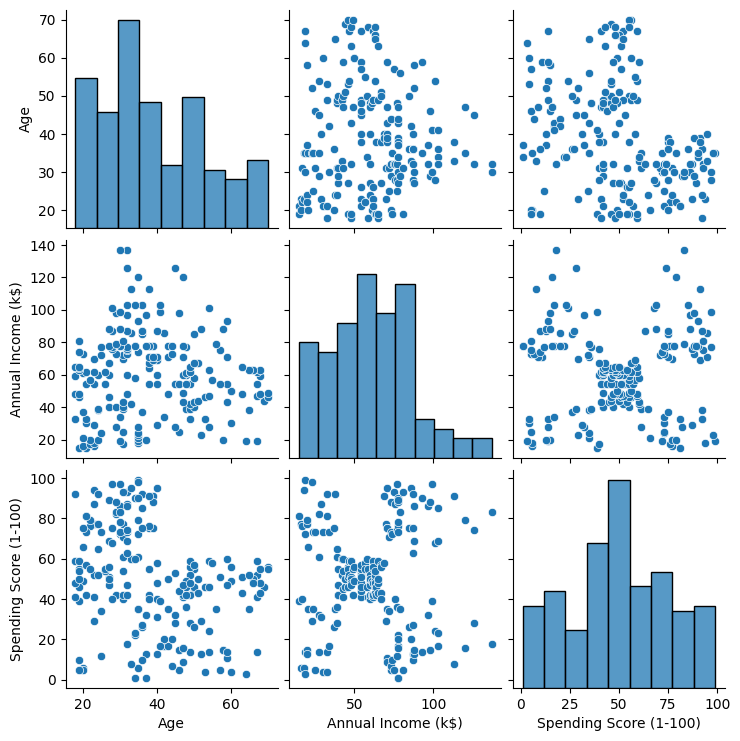

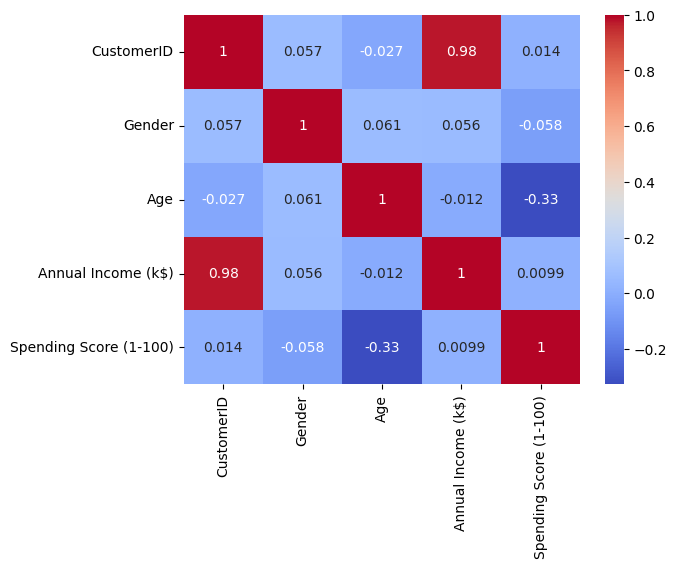

In [9]:

# Gráficos exploratorios
sns.pairplot(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Paso 2: Preprocesamiento
# Eliminar columnas irrelevantes como "CustomerID"
data_clean = data.drop(['CustomerID'], axis=1)

# Convertir variables categóricas (Gender)
data_clean = pd.get_dummies(data_clean, drop_first=True)

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean)

# Paso 3: Selección de características
# (Para KMeans usamos todas las variables relevantes, pero si quisiéramos reducir, aplicaríamos PCA u otro método)
features = data_scaled



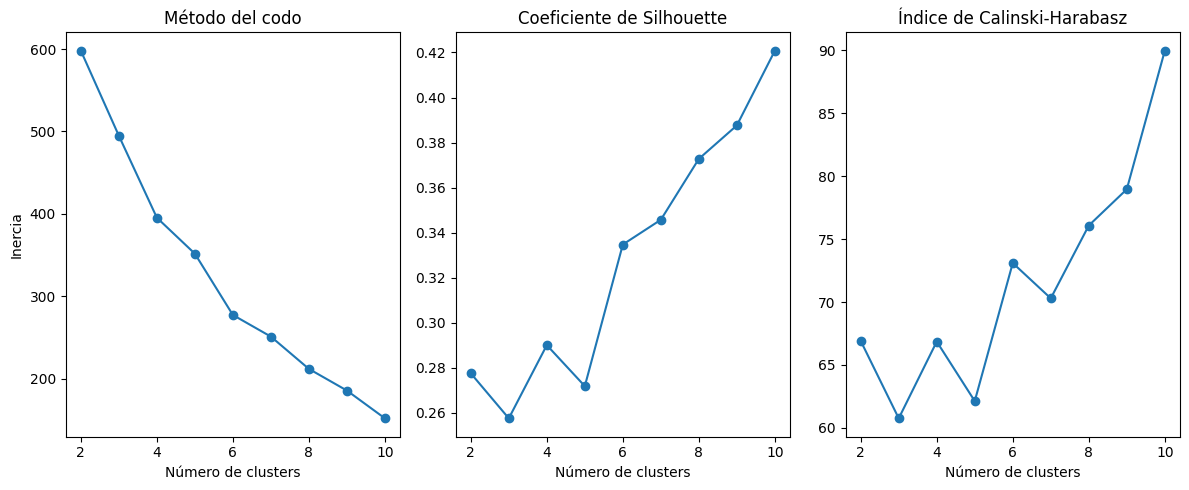

Coeficiente de Silhouette: 0.27191023466188324
Índice de Calinski-Harabasz: 62.12634193286723


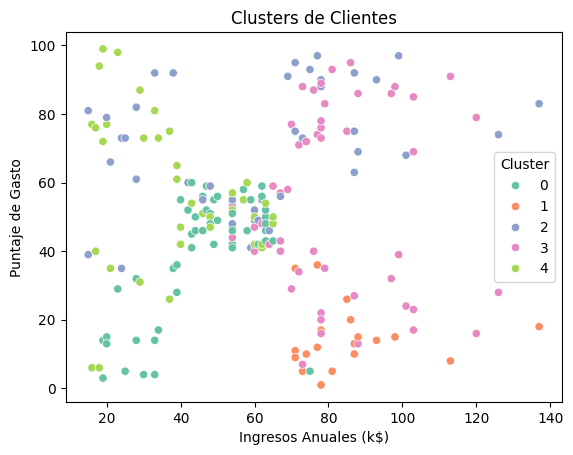


Promedios por cluster:
           Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.509804  56.470588           46.098039               39.313725
1        1.000000  39.500000           85.150000               14.050000
2        1.000000  28.690476           60.904762               70.238095
3        0.000000  37.897959           82.122449               54.448980
4        0.000000  27.315789           38.842105               56.210526


In [10]:
# Paso 4: Entrenar el modelo y encontrar el número óptimo de clusters
inertia = []
silhouette = []
ch_index = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(features, kmeans.labels_))
    ch_index.append(calinski_harabasz_score(features, kmeans.labels_))

# Gráfica de codo
plt.figure(figsize=(12,5))
plt.subplot(1, 3, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')

plt.subplot(1, 3, 2)
plt.plot(k_range, silhouette, marker='o')
plt.title('Coeficiente de Silhouette')
plt.xlabel('Número de clusters')

plt.subplot(1, 3, 3)
plt.plot(k_range, ch_index, marker='o')
plt.title('Índice de Calinski-Harabasz')
plt.xlabel('Número de clusters')

plt.tight_layout()
plt.show()

# Elegimos k=5 por ejemplo basado en los gráficos
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(features)
labels = kmeans.labels_

# Paso 5: Evaluación del modelo
print("Coeficiente de Silhouette:", silhouette_score(features, labels))
print("Índice de Calinski-Harabasz:", calinski_harabasz_score(features, labels))

# Paso 6: Visualización de resultados
# Añadir etiquetas al dataframe original
data_clean['Cluster'] = labels

# Visualización 2D con los dos componentes más relevantes
sns.scatterplot(x=data_clean['Annual Income (k$)'], y=data_clean['Spending Score (1-100)'], hue=data_clean['Cluster'], palette='Set2')
plt.title('Clusters de Clientes')
plt.xlabel('Ingresos Anuales (k$)')
plt.ylabel('Puntaje de Gasto')
plt.show()

# Paso 7: Interpretación y análisis
# Agrupar por cluster para observar diferencias
print("\nPromedios por cluster:")
print(data_clean.groupby('Cluster').mean())


# Nueva sección